#  Evaluating Regression Models 

First things first, wrote the setting

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wrangle
import env

## Load your zillow dataset.

Now draw in the main character.

In [2]:
#now we have the makings of a character from real life and now we need to  adjust him to our story
df = wrangle.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0,261.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0,261.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0,261.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0,261.0


In [3]:
#let's modify a couple of things to make his strong points stand out most
df = wrangle.wrangled_zillow(df)

In [4]:
#We always train on train data
#Let's bring it in
train, validate, test = wrangle.traintestsplit(df)

Fit a linear regression model (ordinary least squares) and compute yhat, 

(predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.)

Here is some sample code to get you started:

## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [5]:
y=train[["taxvaluedollarcnt"]] #what we want
x=train[["calculatedfinishedsquarefeet"]] #how we measure
# I had flipped the values and added double brackets

In [14]:
X_train = train[['calculatedfinishedsquarefeet']]
y_train = train['taxvaluedollarcnt']

X_validate = validate[['calculatedfinishedsquarefeet']]
y_validate = validate['taxvaluedollarcnt']

X_test = test[['calculatedfinishedsquarefeet']]
y_test = test['taxvaluedollarcnt']

In [6]:
x.head()

,calculatedfinishedsquarefeet
1667396,2281.0
250527,1691.0
1334166,1677.0
195429,1627.0
49854,1146.0


In [7]:
y.head()

,taxvaluedollarcnt
1667396,398552.0
250527,108264.0
1334166,135962.0
195429,101427.0
49854,37576.0


Need to turn these into one dimensional arrays

In [15]:
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(x, y)
predictions = model.predict(x)

## Plot the residuals for the linear regression model that you made.

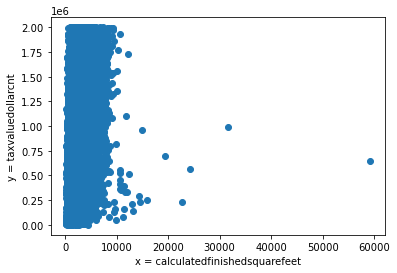

In [16]:
# look at scatter of x vs y
plt.scatter(x, y)
plt.xlabel('x = calculatedfinishedsquarefeet')
plt.ylabel('y = taxvaluedollarcnt');

This above shows me that I may want to  take out houses past 20k squared feet

In [10]:
baseline = y.mean()
baseline

taxvaluedollarcnt    399083.816953
dtype: float64

In [11]:
train['baseline'] = y.mean()
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,baseline
1667396,4.0,3.0,2281.0,398552.0,1994.0,5119.38,6059.0,261.0,NaN
250527,4.0,2.0,1691.0,108264.0,1964.0,1500.33,6037.0,261.0,NaN
1334166,3.0,2.0,1677.0,135962.0,1969.0,1359.26,6059.0,261.0,NaN
195429,3.0,2.0,1627.0,101427.0,1942.0,1159.25,6037.0,261.0,NaN
49854,4.0,2.0,1146.0,37576.0,1955.0,736.77,6037.0,261.0,NaN


In [12]:
train[train.taxvaluedollarcnt == 0]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,propertylandusetypeid,baseline


In [13]:
y

,taxvaluedollarcnt
1667396,398552.0
250527,108264.0
1334166,135962.0
195429,101427.0
49854,37576.0
...,...
1029661,92933.0
482782,1242641.0
184352,259952.0
760959,778720.0
